In [1]:
#importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills']  = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


/home/adenian/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


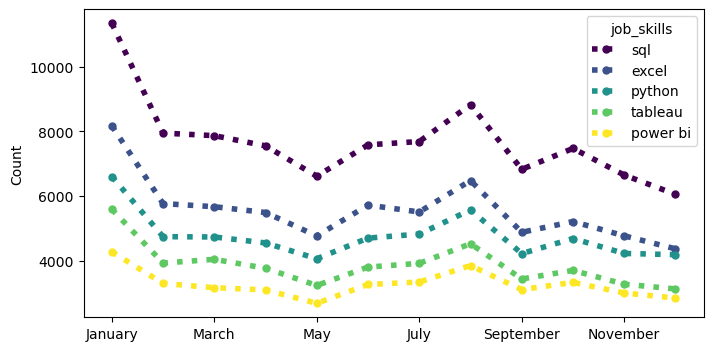

In [9]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)


df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns = 'job_posted_month_no')

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker = 'o',
    markersize=5,
    figsize=(8, 4)
)
plt.ylabel('Count')
plt.xlabel('')
plt.show()



In [3]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')  
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats


,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


/tmp/ipykernel_5529/223334314.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]))


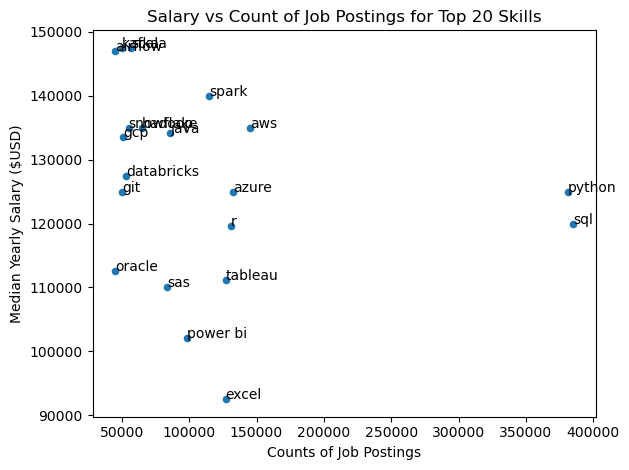

In [4]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.annotate(txt, (skill_stats['skill_count'][i], skill_stats['median_salary'][i]))
    
plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 20 Skills')
plt.tight_layout()

    
plt.show()

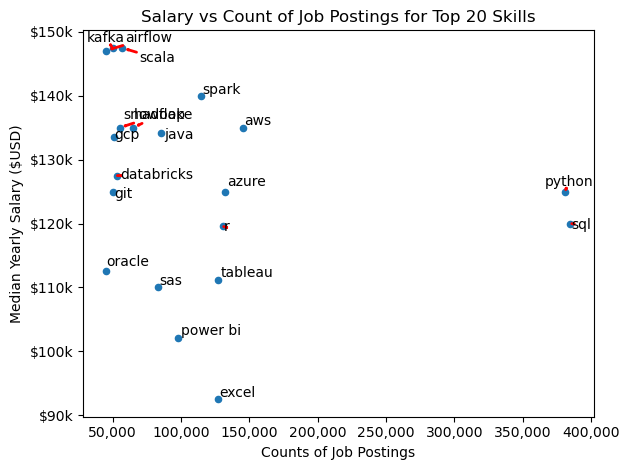

In [27]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=2))

import matplotlib.ticker as mticker

ax = plt.gca()

# Format x-axis with commas
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))

plt.xlabel('Counts of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 20 Skills')
plt.tight_layout()
plt.show()